<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    77.947958  46.576617  25.064118   -50.773346   108.815347   
      1.0    80.313958  36.974386  79.155045   228.100229   434.543618   
      2.0    57.323058  97.494246  22.514954 -2183.780085 -1996.447827   
      3.0    84.582638  92.886609  62.446303  2014.420273  2264.335823   
      4.0    89.657484  62.713492  48.200699  -107.693608   102.878066   
...                ...        ...        ...          ...          ...   
999.0 55.0   93.687228  99.127126  76.324498   -50.645851   228.493000   
      56.0   89.880101  84.531556  61.790029  -914.428073  -668.226387   
      57.0   53.894633  61.047785  82.879081   294.434028   502.255526   
      58.0   51.721584  62.145284  21.414583 -1573.542551 -1428.261100   
      59.0   51.519009  46.418887  98.396835   830.202560  1036.537290   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    179.425076   -70.609729  
      1.0    566.042658  -131.499040  
      2.0    108.147907 -2104.595734  
      3.0    614.043996  1650.291827  
      4.0    482.716934  -379.838868  
...                 ...          ...  
999.0 55.0   171.241042    57.251959  
      56.0   216.605622  -884.832009  
      57.0   191.182673   311.072853  
      58.0   -11.156697 -1417.104403  
      59.0   334.273827   702.263463  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    77.947958  46.576617  25.064118   -50.773346   108.815347   
      1.0    80.313958  36.974386  79.155045   228.100229   434.543618   
      2.0    57.323058  97.494246  22.514954 -2183.780085 -1996.447827   
      3.0    84.582638  92.886609  62.446303  2014.420273  2264.335823   
      4.0    89.657484  62.713492  48.200699  -107.693608   102.878066   
...                ...        ...        ...          ...          ...   
999.0 55.0   93.687228  99.127126  76.324498   -50.645851   228.493000   
      56.0   89.880101  84.531556  61.790029  -914.428073  -668.226387   
      57.0   53.894633  61.047785  82.879081   294.434028   502.255526   
      58.0   51.721584  62.145284  21.414583 -1573.542551 -1428.261100   
      59.0   51.519009  46.418887  98.396835   830.202560  1036.537290   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    179.425076   -70.609729  
      1.0    566.042658  -131.499040  
      2.0    108.147907 -2104.595734  
      3.0    614.043996  1650.291827  
      4.0    482.716934  -379.838868  
...                 ...          ...  
999.0 55.0   171.241042    57.251959  
      56.0   216.605622  -884.832009  
      57.0   191.182673   311.072853  
      58.0   -11.156697 -1417.104403  
      59.0   334.273827   702.263463  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,77.947958,46.576617,25.064118,-50.773346,108.815347,179.425076,-70.609729
1,0.0,1.0,80.313958,36.974386,79.155045,228.100229,434.543618,566.042658,-131.499040
2,0.0,2.0,57.323058,97.494246,22.514954,-2183.780085,-1996.447827,108.147907,-2104.595734
3,0.0,3.0,84.582638,92.886609,62.446303,2014.420273,2264.335823,614.043996,1650.291827
4,0.0,4.0,89.657484,62.713492,48.200699,-107.693608,102.878066,482.716934,-379.838868
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,93.687228,99.127126,76.324498,-50.645851,228.493000,171.241042,57.251959
59996,999.0,56.0,89.880101,84.531556,61.790029,-914.428073,-668.226387,216.605622,-884.832009
59997,999.0,57.0,53.894633,61.047785,82.879081,294.434028,502.255526,191.182673,311.072853
59998,999.0,58.0,51.721584,62.145284,21.414583,-1573.542551,-1428.261100,-11.156697,-1417.104403


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    77.947958  46.576617  25.064118   -50.773346   108.815347   
      1.0    80.313958  36.974386  79.155045   228.100229   434.543618   
      2.0    57.323058  97.494246  22.514954 -2183.780085 -1996.447827   
      3.0    84.582638  92.886609  62.446303  2014.420273  2264.335823   
      4.0    89.657484  62.713492  48.200699  -107.693608   102.878066   
...                ...        ...        ...          ...          ...   
999.0 55.0   93.687228  99.127126  76.324498   -50.645851   228.493000   
      56.0   89.880101  84.531556  61.790029  -914.428073  -668.226387   
      57.0   53.894633  61.047785  82.879081   294.434028   502.255526   
      58.0   51.721584  62.145284  21.414583 -1573.542551 -1428.261100   
      59.0   51.519009  46.418887  98.396835   830.202560  1036.537290   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    179.425076   -70.609729  
      1.0    566.042658  -131.499040  
      2.0    108.147907 -2104.595734  
      3.0    614.043996  1650.291827  
      4.0    482.716934  -379.838868  
...                 ...          ...  
999.0 55.0   171.241042    57.251959  
      56.0   216.605622  -884.832009  
      57.0   191.182673   311.072853  
      58.0   -11.156697 -1417.104403  
      59.0   334.273827   702.263463  

[60000 rows x 7 columns]

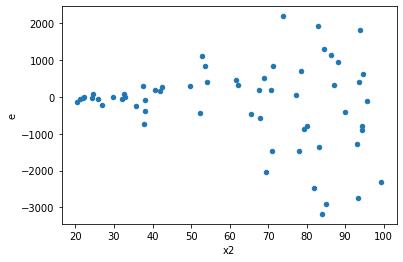

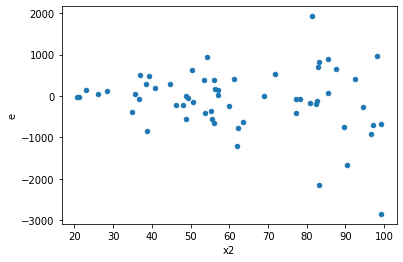

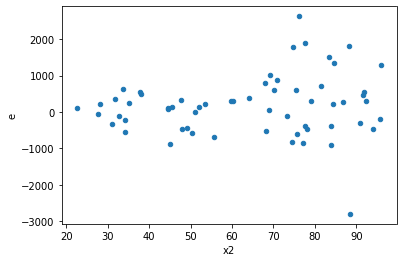

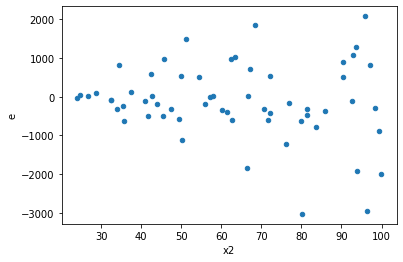

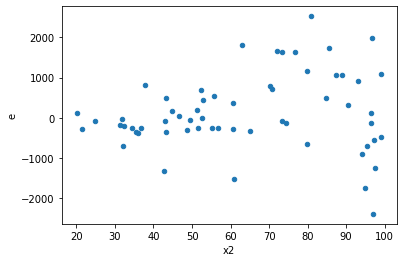

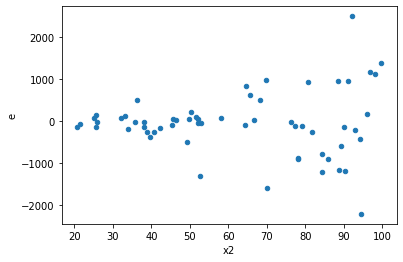

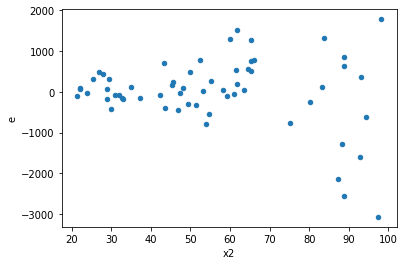

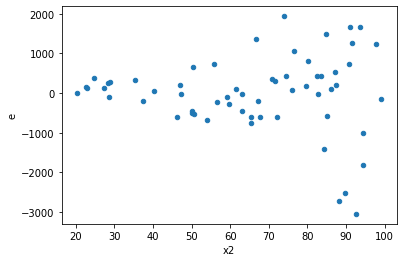

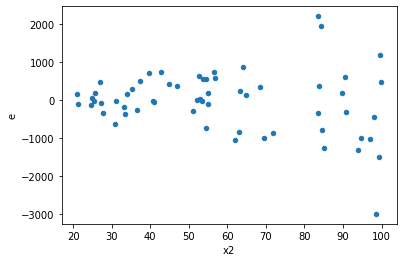

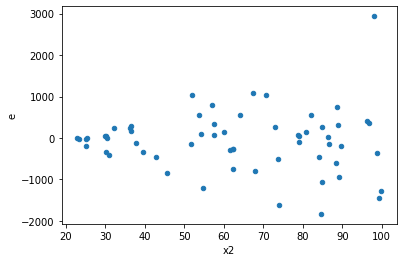

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,25774441.66450636,25939207.28034432,1227354.3649764934,1235200.3466830628,1.0063925968982232,0.9884885792618672,0.5057557103690664,0.4942442896309336,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,11908205.390305797,13583418.818490928,567057.3995383712,646829.467547187,1.1406772366849571,0.7657715296788383,0.6171142351605808,0.38288576483941916,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,11293488.30495298,35259914.0229726,537785.1573787133,1679043.5249034571,3.1221455294294396,0.01194888785871151,0.9940255560706442,0.005974443929355755,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,4854679.101355241,27002454.85969889,231175.1953026305,1285831.1837951853,5.562150308176052,0.00023113061946422597,0.9998844346902679,0.00011556530973211299,Reject005=0 : Heteroscedasticity
9.0,21.0,21.0,6116653.266101004,22303132.627437357,291269.2031476668,1062053.9346398741,3.6462967013420813,0.004556568963733465,0.9977217155181333,0.0022782844818667325,Reject005=0 : Heteroscedasticity
12.0,21.0,21.0,13759701.219313664,18516693.12630669,655223.867586365,881747.29172889,1.3457191279935588,0.5021653905364074,0.7489173047317963,0.2510826952682037,Reject005=1 : Homoscedasticity
14.0,21.0,21.0,11625703.938260756,22313678.526595667,553604.9494409884,1062556.1203140793,1.9193399939560019,0.14330585962557452,0.9283470701872127,0.07165292981278726,Reject005=1 : Homoscedasticity
15.0,21.0,21.0,2625577.753109187,16076144.843186377,125027.51205281842,765530.7068183989,6.122898026595915,0.00011001778657271366,0.9999449911067136,5.500889328635683e-05,Reject005=0 : Heteroscedasticity
19.0,21.0,21.0,10192325.335987002,14104962.422903184,485348.82552319055,671664.877281104,1.3838807100379211,0.46293321976258994,0.768533390118705,0.23146660988129497,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,25774441.66450636,25939207.28034432,1227354.3649764934,1235200.3466830628,1.0063925968982232,0.9884885792618672,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,42331735.90706542,8868836.366629092,2015796.9479554961,422325.541268052,0.20950797732697823,0.000719823827700974,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,18259208.218490086,2395432.6744410503,869486.1056423851,114068.22259243096,0.1311903914878044,1.8762820763213878e-05,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,11908205.390305797,13583418.818490928,567057.3995383712,646829.467547187,1.1406772366849571,0.7657715296788383,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,12094638.955321362,5275175.848408534,575935.1883486363,251198.8499242159,0.43615819107089415,0.06387234730065003,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,18866668.647624493,17435318.4203072,898412.7927440235,830253.2581098666,0.9241333881433532,0.8582372388292906,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,11293488.30495298,35259914.0229726,537785.1573787133,1679043.5249034571,3.1221455294294396,0.01194888785871151,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,4854679.101355241,27002454.85969889,231175.1953026305,1285831.1837951853,5.562150308176052,0.00023113061946422597,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,41053198.017788544,3698250.5240230486,1954914.191323264,176107.16781062135,0.09008434671570724,7.328507159484791e-07,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    583
Reject005=1 : Homoscedasticity      417
Name: Result_test, dtype: int64